# **Prime Number**

**Prime number checking and complexity analysis**

**By [Dibesh Raj Subedi](www.github.com/itsubedibesh)**

## **Defining library and core functions**

- `primeCondition()` function is defined which takes `number` and `check` as agreements and returns `boolean` accordingly
- `checkPrime()` function is defined which takes `checkFunction`, `maxRange`, `showArray` and `returnArray`as agreements.

### **Importing Libraries**

In [670]:
# Importing data science lib
from matplotlib import pyplot as plt

# Importing Time Library to calculate time
import time
import enum


### **Defining Constants**

In [671]:
# Defining Enum class to store Response
class Response(enum.Enum):
    # Print
    print_response = [True, False, False, False]
    print_array = [True, True, False, False]
    # Return
    return_json = [False, False, True, False]
    return_array = [False, False, False, True]
    # Printing and return
    print_response_and_return_json = [True, False, False, True]
    print_response_and_return_array = [True, False, True, False]


# Defining Numberic Constants
Z = 0
O = 1
T = 2
TH = 3


### **Defining Helper Functions**

In [672]:
'''
@description Returns Dash
    This function returns Dash
'''
def getDash(name):
    dash = ""
    for item in name:
        dash += "-"
    return dash

'''
@description Returns Time
    This function returns Time
'''
def getTime(): return time.time()

'''
@description Returns Number with incremental value
    This function returns number + 1 value
'''
getNumber = lambda number, increment=O:  number+increment

'''
@description Returns Number with decremented value
    This function returns number - 1 value
'''
getNumberInverse = lambda number, decrement=O: number-decrement

### **Defining Core Prime Functions**

In [673]:
'''
@description Core Prime Check Condition
    This function checks is the remainder of condition check is 0
'''
primeCondition = lambda number, check: number % check == Z

'''
@description Prints Result
    This function prints result only
'''
def printResult(functionName, iterations, time, showArray, primeArray, maxRange,loopCount):
    dash = getDash(functionName)
    dash += dash
    print(f"\n{dash}")
    print(f"{functionName}")
    print(f"{dash}")
    print(f"Prime number from: {O}")
    print(f"Prime number till: {maxRange}")
    print(f"Array length: {len(primeArray)}")
    print(f"{dash}")
    if showArray:
        print(primeArray)
        print(f"{dash}")
    print(f"Loop Count: {loopCount} loops")
    print(f"Include_LoopCount Iteration: {iterations+maxRange} times")
    print(f"Exclude_LoopCount Iteration: {iterations} times")
    print(f"Time Taken: {time}ms")
    print(f"{dash}\n")

'''
@description Checks Prime
    This Function checks prime using defined prime function till max range 
'''
def checkPrime(checkFunction, maxRange=O, response = Response.print_response):
    response = response.value
    initialTime = getTime()
    functionName = checkFunction.__name__.capitalize()
    maxRange = getNumber(maxRange)
    primeArray = []
    iterations = Z
    loopCount = O
    for index in range(Z, maxRange):
        checkResult = checkFunction(index)
        iterations += checkResult["iterations"]
        loopCount += checkResult["loopCount"]
        if checkResult["countStatus"]:
            primeArray.append(index)
    endTime = getTime()
    loopCount-=O
    # Removing Loop Count
    actualRange = getNumberInverse(maxRange)
    time = round(endTime-initialTime, T)
    if response[0]:
        printResult(functionName, iterations, time,
                    response[1], primeArray, actualRange, loopCount)
    if response[3]:
        return primeArray
    if response[2]:
        return {
            "Function_Name": functionName,
            "Range": {
                "From": O,
                "Till": actualRange,
            },
            "Complexity": {
                "Time": time,
                "LoopCount": loopCount,
                "Iteration": {
                    "Include_LoopCount": iterations+actualRange,
                    "Exclude_LoopCount": iterations,
                }
            },
            "Prime_Stats": {
                "Count": len(primeArray),
                "Numbers": primeArray
            }
        }

## **Algorithms**

1. **`primeLinear`**
2. **`primeLinear_Check3`**

In [674]:
'''
@description Prime Linear
    This function takes the number an iterates till the number and collects 
    all the possible true count if it matches prime condition and finally
    checks if the true count is lessthan 2, which means prime number can 
    only be divisibe but 1 and itself.
'''
def primeLinear(number):
    trueCount = Z
    iterations = Z
    loopCount = Z
    if number != Z:
        loopCount += O
        for index in range(O, getNumber(number)):
            iterations += O
            if primeCondition(number, index):
                trueCount += O
        return {"iterations": iterations, "countStatus": trueCount <= T, 'loopCount': loopCount}
    else:
        return {"iterations": Z, "countStatus": False, 'loopCount': loopCount}


'''
@description Prime Linear Check 3
    This function takes the number an iterates till the number and collects 
    all the possible true count if it matches prime condition and exits when 
    primary count is 3 if its not primary and finally checks if the true count
    is lessthan 2, which means prime number can only be divisibe but 1 and itself.
'''
def primeLinear_Check3(number):
    trueCount = Z
    iterations = Z
    loopCount = Z
    if number != Z:
        loopCount += O
        for index in range(O, getNumber(number)):
            iterations += O
            if trueCount != TH:
                if primeCondition(number, index):
                    trueCount += O
            else:
                break
        return {"iterations": iterations, "countStatus": trueCount <= T, 'loopCount': loopCount}
    else:
        return {"iterations": Z, "countStatus": False, 'loopCount': Z}


## **Examples**

**primeCondition**
**`result = primeCondition(7,7)`**
<pre>
returns
    True 
</pre>

**checkPrime**

1.  
    **`checkPrime(primeLinear,400)`**
    <pre>
    prints
        Iterations: 79 times
        Time Taken: 0.0ms
    </pre>

2. 
    **`checkPrime(primeLinear,400,Response.print_array)`**
    <pre>
    prints
        [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, ... 389, 397]
        Iterations: 79 times
        Time Taken: 0.1ms
    </pre>

3. 
    **`checkPrime(primeLinear,400,Response.return_array)`**
    <pre>
    prints
        Iterations: 79 times
        Time Taken: 0.0ms
    returns
        [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41,... 389, 397]
    </pre>

4. 
    **`checkPrime(primeLinear,400,Response.return_json)`**
    <pre>
    prints
        Iterations: 79 times
        Time Taken: 0.0ms
    returns
       {
            'Function_Name': 'Primelinear',
            'Range': {
                'From': 1,
                'Till': 400
            },
            'Complexity': {
                'Time': 0.04,
                'LoopCount': 400,
                'Iteration': {
                    'Include_LoopCount': 80600,
                    'Exclude_LoopCount': 80200
                }
            },
            'Prime_Stats': {
                'Count': 79,
                'Numbers': [1,2,3,5,7,11,13,17,.....,389,397]
            }
        }
    </pre>


In [675]:
# PrimeCondition
# This returns True because 7%7 is 0 and condition is [number%check==0]

# Remove # from the in following line
# print(primeCondition(7, 7))


In [676]:
# Check Prime 1
# Remove # from the in following line
# checkPrime(primeLinear,400)


In [677]:
# Check Prime 2
# Remove # from the in following line
checkPrime(primeLinear,1200,Response.print_array)
checkPrime(primeLinear_Check3,1200,Response.print_array)



----------------------
Primelinear
----------------------
Prime number from: 1
Prime number till: 1200
Array length: 197
----------------------
[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039

In [678]:
# Check Prime 3
# Remove # from the in following line
# checkPrime(primeLinear,1200,Response.return_array)


In [679]:
# Check Prime 3
# Remove # from the in following line
# checkPrime(primeLinear,400,Response.return_json)


## **Comparision and Testing**

#### **Iteration Comparision**

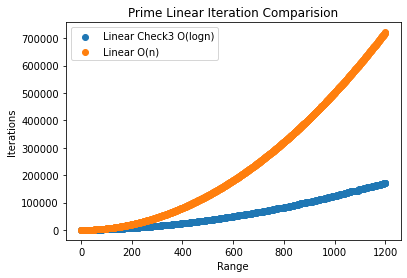

In [680]:
number = 1200
difference = 1

rangeX1 = []
rangeY1 = []
rangeY2 = []
for index in range(Z, number+O, difference):
    rangeX1.append(index)
    rangeY1.append(checkPrime(primeLinear_Check3, index, Response.return_json)[
                "Complexity"]["Iteration"]["Include_LoopCount"])
    rangeY2.append(checkPrime(primeLinear, index, Response.return_json)[
                "Complexity"]["Iteration"]["Include_LoopCount"])
# Ploting using matplotlib
plt.scatter(rangeX1, rangeY1)
plt.scatter(rangeX1, rangeY2)
plt.legend(["Linear Check3 O(logn)", "Linear O(n)"])
plt.title("Prime Linear Iteration Comparision")
plt.xlabel("Range")
plt.ylabel("Iterations")
plt.show()


#### **Time Comparision**

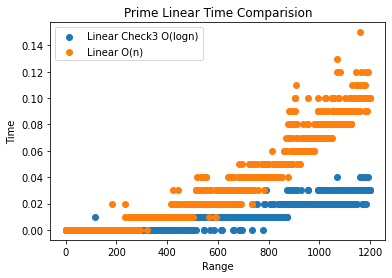

In [681]:
number = 1200
difference = 1

rangeX1 = []
rangeY1 = []
rangeY2 = []
for index in range(Z, number+O, difference):
    rangeX1.append(index)
    rangeY1.append(checkPrime(primeLinear_Check3, index, Response.return_json)[
                   "Complexity"]["Time"])
    rangeY2.append(checkPrime(primeLinear, index, Response.return_json)[
                   "Complexity"]["Time"])
# Ploting using matplotlib                   
plt.scatter(rangeX1, rangeY1)
plt.scatter(rangeX1, rangeY2)
plt.legend(["Linear Check3 O(logn)", "Linear O(n)"])
plt.title("Prime Linear Time Comparision")
plt.xlabel("Range")
plt.ylabel("Time")
plt.show()
